In [1]:
import pandas as pd
data_frame = pd.read_csv('supplier_data.csv')
print(data_frame)
data_frame.to_csv('pandas_output.csv', index=False)

   Supplier Name Invoice Number  Part Number      Cost Purchase Date
0     Supplier X       001-1001         2341  $500.00      1/20/2014
1     Supplier X       001-1001         2341  $500.00      1/20/2014
2     Supplier X       001-1001         5467  $750.00      1/20/2014
3     Supplier X       001-1001         5467  $750.00      1/20/2014
4     Supplier Y        50-9501         7009  $250.00      1/30/2014
5     Supplier Y        50-9501         7009  $250.00      1/30/2014
6     Supplier Y        50-9505         6650  $125.00       2/3/2014
7     Supplier Y        50-9505         6650  $125.00       2/3/2014
8     Supplier Z       920-4803         3321  $615.00       2/3/2014
9     Supplier Z       920-4804         3321  $615.00      2/10/2014
10    Supplier Z       920-4805         3321  $615.00      2/17/2014
11    Supplier Z       920-4806         3321  $615.00      2/24/2014


In [14]:
data_frame = pd.read_excel('sales_2013.xlsx', sheet_name = 'january_2013', index_col=None)
print(data_frame)

   Customer ID       Customer Name Invoice Number  Sale Amount Purchase Date
0         1234          John Smith       100-0002         1200      1/1/2013
1         2345       Mary Harrison       100-0003         1425      1/6/2013
2         3456          Lucy Gomez       100-0004         1390     1/11/2013
3         4567        Rupert Jones       100-0005         1257     1/18/2013
4         5678       Jenny Walters       100-0006         1725     1/24/2013
5         6789  Samantha Donaldson       100-0007         1995     1/31/2013


In [15]:
#파일 필터링 하기
data_frame_value_meets_condition = data_frame[(data_frame['Sale Amount'].astype(float)>1400.0)]
print(data_frame_value_meets_condition)

   Customer ID       Customer Name Invoice Number  Sale Amount Purchase Date
1         2345       Mary Harrison       100-0003         1425      1/6/2013
4         5678       Jenny Walters       100-0006         1725     1/24/2013
5         6789  Samantha Donaldson       100-0007         1995     1/31/2013


In [16]:
#특정 날짜 포함하는 자료만 출력하기
important_dates=['1/24/2013', '1/31/2013']
data_frame_value_in_set = data_frame[data_frame['Purchase Date'].isin(important_dates)]
print(data_frame_value_in_set)

   Customer ID       Customer Name Invoice Number  Sale Amount Purchase Date
4         5678       Jenny Walters       100-0006         1725     1/24/2013
5         6789  Samantha Donaldson       100-0007         1995     1/31/2013


In [18]:
#헤더 사용(iloc)
data_frame_column_by_index=data_frame.iloc[:, [1,4]]
print(data_frame_column_by_index)

        Customer Name Purchase Date
0          John Smith      1/1/2013
1       Mary Harrison      1/6/2013
2          Lucy Gomez     1/11/2013
3        Rupert Jones     1/18/2013
4       Jenny Walters     1/24/2013
5  Samantha Donaldson     1/31/2013


In [19]:
#헤더 사용(loc)
data_frame_column_by_name = data_frame.loc[:, ['Customer ID', 'Purchase Date']]
print(data_frame_column_by_name)

   Customer ID Purchase Date
0         1234      1/1/2013
1         2345      1/6/2013
2         3456     1/11/2013
3         4567     1/18/2013
4         5678     1/24/2013
5         6789     1/31/2013


In [21]:
#모든 워크시트에서 특정 행 필터링하기
data_frame = pd.read_excel('sales_2013.xlsx', sheet_name=None, index_col=None)
#sheet_name에 None을 주면 엑셀 파일 전체를 가져오게 된다.
#이 경우에 불러온 데이터 프레임은 각 시트명을 키값으로 하는 딕셔너리 형태가 된다.
row_output = []
for worksheet_name, data in data_frame.items():
    row_output.append(data[data['Sale Amount'].replace('$', '').replace(' ,','').astype(float) > 2000.0])
#리스트는 데이터 프레임도 담을 수 있다. 이를 합치는 것이 concat 기능이다.
filtered_rows=pd.concat(row_output, axis=0, ignore_index = True)
print(filtered_rows)

   Customer ID  Customer Name Invoice Number  Sale Amount Purchase Date
0         7654   Roger Lipney       100-0010         2135     2/15/2013
1         6543     Rachel Paz       100-0017         2042     3/22/2013
2         4321  Susan Wallace       100-0019         2280     3/30/2013


In [22]:
#모든 워크시트에서 특정 열 선택하기
column_output=[]
for worksheet_name, data in data_frame.items():
    column_output.append(data.loc[:, ['Customer Name', 'Sale Amount']])
selected_columns = pd.concat(column_output, axis=0, ignore_index=True)
print(selected_columns)

         Customer Name  Sale Amount
0           John Smith         1200
1        Mary Harrison         1425
2           Lucy Gomez         1390
3         Rupert Jones         1257
4        Jenny Walters         1725
5   Samantha Donaldson         1995
6        Daniel Farber         1115
7          Laney Stone         1367
8         Roger Lipney         2135
9        Thomas Haines         1346
10         Anushka Vaz         1560
11      Harriet Cooper         1852
12          John Smith         1350
13           Tony Song         1167
14      Marry Harrison         1789
15          Rachel Paz         2042
16          Lucy Gomez         1511
17       Susan Wallace         2280


   Customer ID  Customer Name Invoice Number  Sale Amount Purchase Date
0         1234     John Smith       100-0002         1200      1/1/2013
1         2345  Mary Harrison       100-0003         1425      1/6/2013
2         3456     Lucy Gomez       100-0004         1390     1/11/2013
3         4567   Rupert Jones       100-0005         1257     1/18/2013
4         5678  Jenny Walters       100-0006         1725     1/24/2013
--------------------
    Customer ID   Customer Name Invoice Number  Sale Amount Purchase Date
13         8765       Tony Song       100-0015         1167      3/8/2013
14         2345  Marry Harrison       100-0016         1789     3/17/2013
15         6543      Rachel Paz       100-0017         2042     3/22/2013
16         3456      Lucy Gomez       100-0018         1511     3/28/2013
17         4321   Susan Wallace       100-0019         2280     3/30/2013
--------------------
total sales:  28506.0
average sales:  1583.67


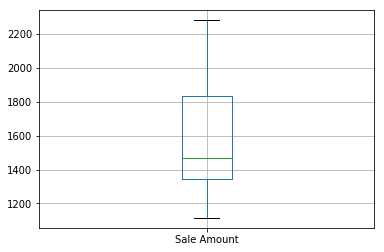

In [24]:
#합과 평균 구하기 - pd.sum(), pd.mean()을 사용한다.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = \
pd.read_excel('sales_2013.xlsx', sheet_name = None, index_col=None)
row_list = []
for worksheet_name, data in df.items():
    row_list.append(data)
data_frame = pd.concat(row_list, axis=0, ignore_index=True)


print(data_frame.head())
print('-'*20)
print(data_frame.tail())
print('-'*20)


total_sales = \
pd.DataFrame([float(str(value).strip('$').replace(',','')) \
              for value in data_frame.loc[:, 'Sale Amount']]).sum()
average_sales = \
pd.DataFrame([float(str(value).strip('$').replace(',','')) \
             for value in data_frame.loc[:, 'Sale Amount']]).mean()

print('total sales: ', round(float(total_sales), 2))
print('average sales: ', round(float(average_sales), 2))

df2 = data_frame[['Customer Name', 'Sale Amount']]
df2.boxplot()
plt.show()